In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
import sklearn
from sklearn import tree
from math import log

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import RandomizedSearchCV

In [5]:
note = pd.read_json("by_round.txt", orient = "index")

In [6]:
note

,round,gold_spent,health,hp_lost,rerolls,units,bought,sold,move_freq
1,1-1,0,100.0,0,0,1,0,0,1
2,1-3,4,100.0,0,1,7,6,0,2
3,1-4,2,100.0,0,1,12,5,0,2
4,2-1,3,96.0,4,1,12,5,0,0
5,2-2,4,92.0,4,1,20,8,0,3
...,...,...,...,...,...,...,...,...,...
280474,5-6,11,58.0,0,6,50,0,0,0
280475,5-7,21,58.0,0,7,53,3,0,0
280476,6-1,29,58.0,0,13,54,1,0,0
280477,6-2,0,58.0,0,0,45,0,9,0


In [23]:
scaler = MinMaxScaler()

note[['gold_spent', 'rerolls', 'bought', 'sold', 'move_freq', 'hp_lost']] = scaler.fit_transform(note[['gold_spent', 'rerolls', 'bought', 'sold', 'move_freq', 'hp_lost']])

X = note[['gold_spent', 'rerolls', 'bought', 'sold', 'move_freq']]


y = note[['hp_lost']]


## Linear Regression


R_sq score
0.024793337287258077
[ 0.0542074   0.06980976 -0.00121158  0.02668321  0.00487461]
gold_spent: 0.05421
rerolls: 0.06981
bought: -0.00121
sold: 0.02668
move_freq: 0.00487


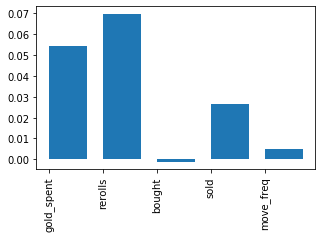

In [24]:
# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

print("R_sq score")
print(model.score(X, y))

# get importance
importance = model.coef_

print(importance[0])

#summarize feature importance
for i,v in zip(X.columns, importance[0]):
    print('%s: %.5f' % (i,v))
    
# plot feature importance
pyplot.figure(figsize=(5, 3))
pyplot.bar([x for x in range(len(importance[0]))], importance[0], align='edge', width = 0.7)
pyplot.xticks([x for x in range(len(importance[0]))], X.columns, rotation='vertical')
pyplot.show()

In [26]:
rfe = RFE(model, 28)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Random Forest


C:\Users\jingj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


gold_spent: 0.30680
rerolls: 0.19473
bought: 0.17278
sold: 0.13872
move_freq: 0.18698


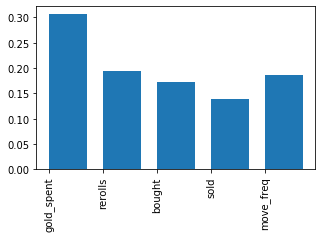

0.2755437728970874
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [30]:
# define the model
model = RandomForestRegressor(n_estimators = 10)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(X.columns, importance):
    print('%s: %.5f' % (i,v))
# plot feature importance
model.feature_importances_

pyplot.figure(figsize=(5, 3))
pyplot.bar( range(len(model.feature_importances_)), model.feature_importances_, align='edge', width = 0.7)
pyplot.xticks(range(len(model.feature_importances_)), X.columns, rotation='vertical')
pyplot.show()


print(model.score(X, y))
print(model.get_params())

C:\Users\jingj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


gold_spent: 0.30367
rerolls: 0.19606
bought: 0.16841
sold: 0.13805
move_freq: 0.19381


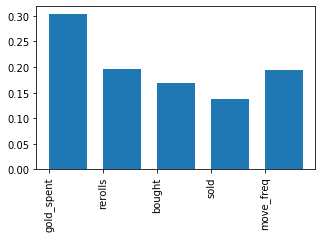

0.29195956292881375
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [32]:
# define the model
model = RandomForestRegressor(n_estimators = 100)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(X.columns, importance):
    print('%s: %.5f' % (i,v))
# plot feature importance
model.feature_importances_

pyplot.figure(figsize=(5, 3))
pyplot.bar( range(len(model.feature_importances_)), model.feature_importances_, align='edge', width = 0.7)
pyplot.xticks(range(len(model.feature_importances_)), X.columns, rotation='vertical')
pyplot.show()


print(model.score(X, y))
print(model.get_params())

In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 86.1min finished
C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [35]:
rf_random.best_params_

{'n_estimators': 157,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

C:\Users\jingj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


gold_spent: 0.41475
rerolls: 0.30422
bought: 0.07894
sold: 0.08849
move_freq: 0.11359


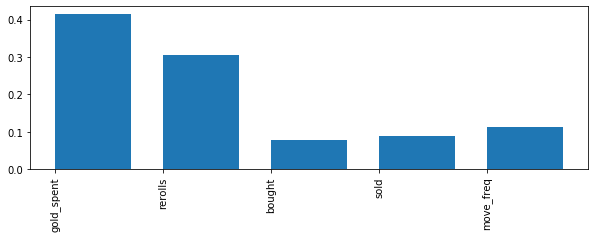

0.08329713955235452
{'bootstrap': True, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 157, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [40]:
# define the model
model = RandomForestRegressor(n_estimators = 157, min_samples_split = 2, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 10, bootstrap = True)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in zip(X.columns, importance):
    print('%s: %.5f' % (i,v))
# plot feature importance
model.feature_importances_

pyplot.figure(figsize=(10, 3))
pyplot.bar( range(len(model.feature_importances_)), model.feature_importances_, align='edge', width = 0.7)
pyplot.xticks(range(len(model.feature_importances_)), X.columns, rotation='vertical')
pyplot.show()


print(model.score(X, y))
print(model.get_params())

In [41]:
print(model.score(X, y))

0.08329713955235452
